# Data cleaning and Analysis

In [1]:
# Import libaries and dependencies:

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data & convert to dataframe:

batting_data_load = "../Project_01/CHC_batting.csv"
batting_data = pd.read_csv(batting_data_load)
batting_data.head()

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No


In [3]:
# Import data & convert to dataframe:

pitching_data_load = "../Project_01/CHC_pitching.csv"
pitching_data = pd.read_csv(pitching_data_load)
pitching_data.head()

,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
1,2,2023,SP,Jameson Taillon,31,8,10,0.444,4.84,30,...,93,4.61,1.276,9.1,1.6,2.4,8.2,3.41,Right,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
3,4,2023,SP,Kyle Hendricks,33,6,8,0.429,3.74,24,...,120,3.81,1.204,9.1,0.9,1.8,6.1,3.44,Right,No
4,5,2023,SP,Marcus Stroman,32,10,9,0.526,3.95,27,...,113,3.58,1.259,7.9,0.6,3.4,7.8,2.29,Right,No


In [4]:
# Explore data:

print("General info about batting:")
print(batting_data.shape)
print(batting_data.columns)
print(batting_data.dtypes)

print("General info about pitching:")
print(pitching_data.shape)
print(pitching_data.columns)
pitching_data.dtypes

General info about batting:
(5241, 31)
Index(['Rank', 'Year', 'Position', 'Name', 'Age', 'Games', 'Plate_Appearances',
       'At_Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home_Runs',
       'Runs_Batted_In', 'Stolen_Bases', 'Caught_Stealing', 'Base_On_Balls',
       'Strikeouts', 'Batting_Average', 'On_Base_Percentage',
       'Slugging_Percentage', 'On_Base_Plus_Slugging_Percentage',
       'On_Base_Plus_Slugging_Percentage_Plus', 'Total_Bases',
       'Double_Plays_Grounded_Into', 'Times_Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Intentional_Bases_on_Balls', 'Dominant_Hand',
       'Switch_Hitter'],
      dtype='object')
Rank                                       int64
Year                                       int64
Position                                  object
Name                                      object
Age                                        int64
Games                                      int64
Plate_Appearances                          int64
At_B

Rank                               int64
Year                               int64
Position                          object
Name                              object
Age                                int64
Wins                               int64
Losses                             int64
Winning_Percentage               float64
Earned_Run_Average               float64
Games_Played                       int64
Games_Started                      int64
Games_Finished                     int64
Complete_Games                     int64
Shutouts                           int64
Saves                              int64
Innings_Pitched                  float64
Hits_Allowed                       int64
Runs_Allowed                       int64
Earned_Runs                        int64
Home_Runs_Allowed                  int64
Walks_Allowed                      int64
Intentional_Walks_Allowed          int64
Strikeouts                         int64
Hit_By_Pitch                       int64
Balks           

In [5]:
# Convert object to string:

batting_data['Position'] = batting_data['Position'].astype("string")
print(batting_data['Position'].dtype)

string


In [6]:
# Convert object to string:

pitching_data['Dominant_Hand'] = pitching_data['Dominant_Hand'].astype("string")
print(pitching_data['Dominant_Hand'].dtype)

string


In [7]:
# Check for missing values, duplicates, etc,:

print(batting_data.isna().sum())               
print(pitching_data.isna().sum())

Rank                                      0
Year                                      0
Position                                 78
Name                                      0
Age                                       0
Games                                     0
Plate_Appearances                         0
At_Bats                                   0
Runs                                      0
Hits                                      0
Doubles                                   0
Triples                                   0
Home_Runs                                 0
Runs_Batted_In                            0
Stolen_Bases                              0
Caught_Stealing                           0
Base_On_Balls                             0
Strikeouts                                0
Batting_Average                           0
On_Base_Percentage                        0
Slugging_Percentage                       0
On_Base_Plus_Slugging_Percentage          0
On_Base_Plus_Slugging_Percentage

In [8]:
# There are 78 nans in the Position column. List the batting positions:

batting_data["Position"].unique()

<StringArray>
[ 'C', '1B', '2B', 'SS', '3B', 'LF', 'CF', 'RF', 'DH', 'CI', 'OF',  'P', 'UT',
 'IF', 'MI', <NA>]
Length: 16, dtype: string

In [9]:
# Duplicates: Since the players are listed by rank, each player should only appear once per year:
# It appears there aren't any duplicates.

len(batting_data["Name"].value_counts())

2219

In [10]:
# Checking and printing for any duplicate players:

duplicate_players = batting_data.loc[batting_data.duplicated(['Name','Year']), "Name"].unique()
print(duplicate_players)

[]


In [11]:
# Number of players:

num_players_total = len(batting_data)

#Print the result
print(f"Total number of obs in batting data dataset: {num_players_total}")

Total number of obs in batting data dataset: 5241


<function matplotlib.pyplot.show(close=None, block=None)>

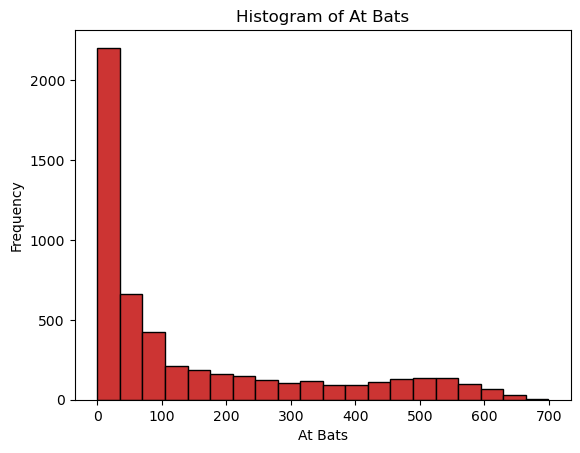

In [12]:
# Histogram of Number of At Bats:

plt.hist(batting_data['At_Bats'], bins =20, color= (204/255, 52/255, 51/255), edgecolor= 'black')
plt.xlabel ('At Bats')
plt.ylabel ('Frequency')
plt.title('Histogram of At Bats')
plt.show
# plt.savefig(r"C:\Users\emily\OneDrive\Desktop\Project_one\Project_01\Histogram_at_bats_OG")

This Histogram of At Bats shows the data is skewed to the right, with roughly half of players having less than 100 At Bats, which could skew the analysis with limited performance statistics.

In [13]:
#Filtering players for batting data - dropping any players who had less than 50 "at bats" to clean the data.

filtered_players = batting_data[batting_data['At_Bats'] >= 50]
filtered_players

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,6,1876,OF,Bob Addy,34,32,147,142,36,40,...,0.630,102,46,0,0,0,0,0,Left,No
5236,7,1876,OF,John Glenn,26,66,288,276,55,84,...,0.685,120,97,0,0,0,0,0,Right,No
5237,8,1876,OF,Paul Hines,21,64,306,305,62,101,...,0.773,146,134,0,0,0,0,0,Right,No
5238,9,1876,OF,Oscar Bielaski,29,32,141,139,24,29,...,0.450,44,32,0,0,0,0,0,Right,No


<function matplotlib.pyplot.show(close=None, block=None)>

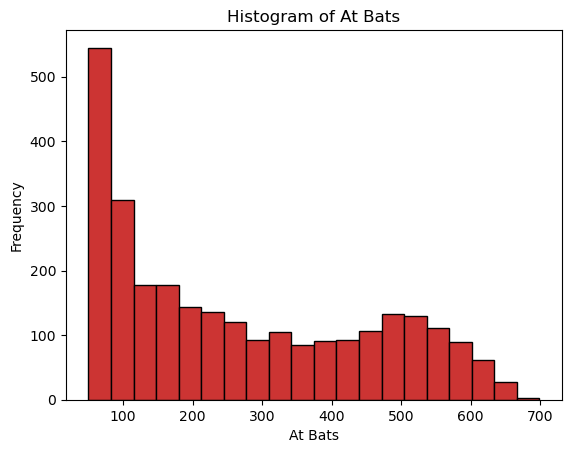

In [57]:
# Histogram of Number of At Bats:

plt.hist(filtered_players['At_Bats'], bins =20, color= (204/255, 52/255, 51/255), edgecolor= 'black')
plt.xlabel ('At Bats')
plt.ylabel ('Frequency')
plt.title('Histogram of At Bats')
plt.show

In [14]:
print(filtered_players.isna().sum())  
#Filtering the players also eliminates the issue of the 78 Players with missing positions

Rank                                     0
Year                                     0
Position                                 0
Name                                     0
Age                                      0
Games                                    0
Plate_Appearances                        0
At_Bats                                  0
Runs                                     0
Hits                                     0
Doubles                                  0
Triples                                  0
Home_Runs                                0
Runs_Batted_In                           0
Stolen_Bases                             0
Caught_Stealing                          0
Base_On_Balls                            0
Strikeouts                               0
Batting_Average                          0
On_Base_Percentage                       0
Slugging_Percentage                      0
On_Base_Plus_Slugging_Percentage         0
On_Base_Plus_Slugging_Percentage_Plus    0
Total_Bases

# Research Question #1: 

### What impact does age have on baseball performance for players of the Chicago Cubs? 

A linear regression was run on runs, hits, doubles, triples, and home runs. A boxplot was created for home runs and age, to see if a linear relationship existed (age 31 was found to have the most home runs on average, which served as the limitus age for the t-test). Finally, a t-test was run to see if there is statistical significance between two age groups: under 31 years, and at 31 or over 31 years. 

In [15]:
# Number of players:

num_players_total_filtered = len(filtered_players)

# Print the result
print(f"Total number of players in batting data dataset: {num_players_total_filtered}")

Total number of players in batting data dataset: 2735


In [16]:
# Average Age of Players:

average_age = filtered_players['Age'].mean()
print(f"The average age is: {average_age}")

The average age is: 28.16014625228519


In [17]:
# Averages Games Played: 

average_games_played = filtered_players['Games'].mean()
print(f"The average games played is:{average_games_played}")

The average games played is:81.79744058500914


In [18]:
# Summary:

summary_df = pd.DataFrame({'Metric': ['Number of Players', 'Average Age', 'Average Games Played'],
                           'Value': [round(num_players_total_filtered, 0), round(average_age, 1), round(average_games_played,1)]})

summary_df

,Metric,Value
0,Number of Players,2735.0
1,Average Age,28.2
2,Average Games Played,81.8


In [19]:
# Positions & Percentages:

position_counts = filtered_players['Position'].value_counts()
print("Number of players in each position:")
print(position_counts)

position_percentages = filtered_players['Position'].value_counts(normalize=True)*100

print("\nPercentage of players in each position:")
print(position_percentages)

Number of players in each position:
Position
P     496
OF    472
C     348
2B    227
SS    213
1B    210
3B    209
CF    126
LF    117
UT    110
RF     97
IF     78
MI     22
CI      6
DH      4
Name: count, dtype: Int64

Percentage of players in each position:
Position
P     18.135283
OF     17.25777
C     12.723949
2B     8.299817
SS     7.787934
1B     7.678245
3B     7.641682
CF     4.606947
LF     4.277879
UT     4.021938
RF     3.546618
IF      2.85192
MI     0.804388
CI     0.219378
DH     0.146252
Name: proportion, dtype: Float64


In [20]:
# Position Summary:

position_summary = pd.DataFrame({'Position': position_counts.index,
                                 'Number of Players': position_counts.values,
                                 'Percentages of Players':position_percentages.values.round(2)})
position_summary

,Position,Number of Players,Percentages of Players
0,P,496,18.14
1,OF,472,17.26
2,C,348,12.72
3,2B,227,8.3
4,SS,213,7.79
5,1B,210,7.68
6,3B,209,7.64
7,CF,126,4.61
8,LF,117,4.28
9,UT,110,4.02


In [21]:
# Creating new columns ( averages across games for: Home Runs, Doubles, Tiples, Hits, Runs) in the DataFrame for average homeruns per game:

filtered_players['homerun_per_game'] = filtered_players['Home_Runs'] / filtered_players['Games']
filtered_players['doubles_per_game'] = filtered_players['Doubles'] / filtered_players['Games']
filtered_players['triples_per_game'] = filtered_players['Triples'] / filtered_players['Games']
filtered_players['hits_per_game'] = filtered_players['Hits'] / filtered_players['Games']
filtered_players['runs_per_game'] = filtered_players['Runs'] / filtered_players['Games']

# Display the updated DataFrame
print(filtered_players)

      Rank  Year Position            Name  Age  Games  Plate_Appearances  \
0        1  2023        C       Yan Gomes   35    116                419   
1        2  2023       1B    Trey Mancini   31     79                263   
2        3  2023       2B    Nico Hoerner   26    150                688   
3        4  2023       SS  Dansby Swanson   29    147                638   
4        5  2023       3B   Nick Madrigal   26     92                294   
...    ...   ...      ...             ...  ...    ...                ...   
5235     6  1876       OF        Bob Addy   34     32                147   
5236     7  1876       OF      John Glenn   26     66                288   
5237     8  1876       OF      Paul Hines   21     64                306   
5238     9  1876       OF  Oscar Bielaski   29     32                141   
5240    11  1876        P     Al Spalding   25     66                298   

      At_Bats  Runs  Hits  ...  Sacrifice_Hits  Sacrifice_Flies  \
0         382    44 

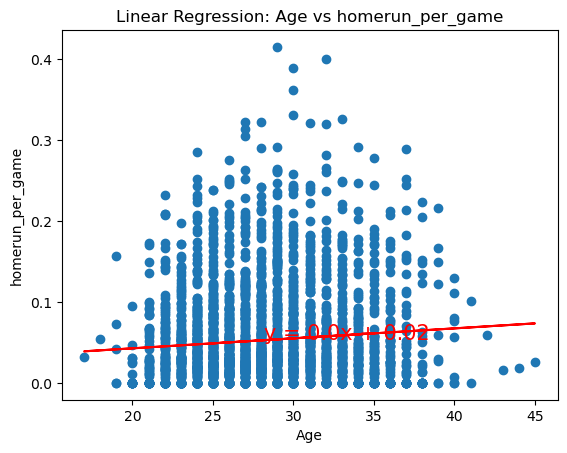

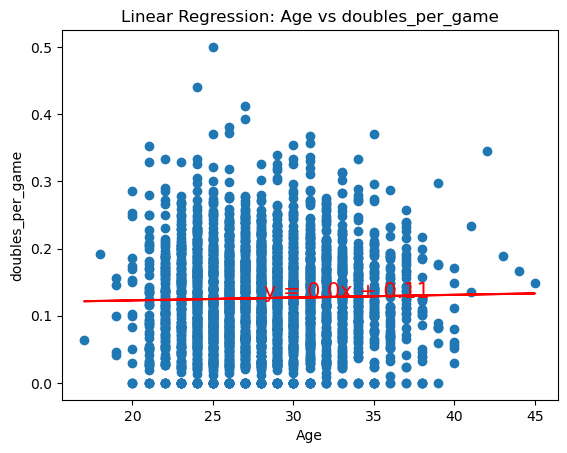

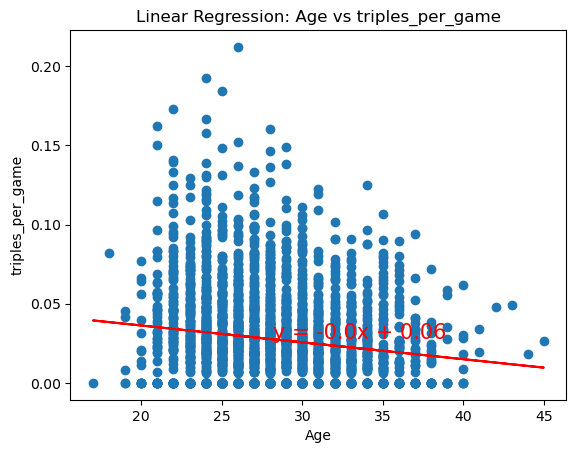

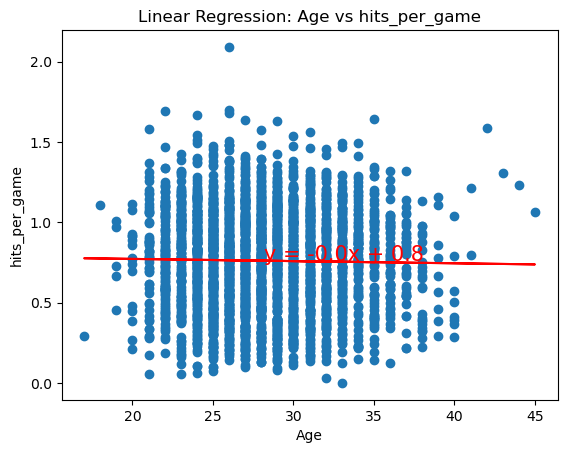

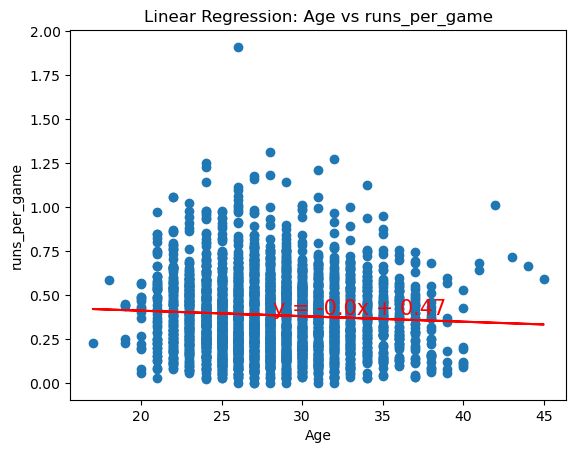

In [22]:
# Linear regressions - looking at age versus the following variables: runs, hits, doubles, triples, and home runs:

def linear_regression_plot(x, y, xlabel, ylabel):
    slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (x.mean(), y.mean()), fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Linear Regression: {xlabel} vs {ylabel}')
    plt.show()

columns_age_regress = ["homerun_per_game", "doubles_per_game", "triples_per_game", "hits_per_game", "runs_per_game"]

# Define the filter condition (e.g., filtered players less than 50 at bats) - already done above.
# filtered_players = batting_data[batting_data['At_Bats'] >= 50]

# Apply linear regression only to rows that meet the filter condition
for column in columns_age_regress:
    linear_regression_plot(filtered_players["Age"],filtered_players[column], "Age", column)

When measured against age, for the linear regressions, there is a slight positive correlation for home runs per game. There is no correlation for doubles and hits per game. There is a slight negative correlation for triples and runs per game.

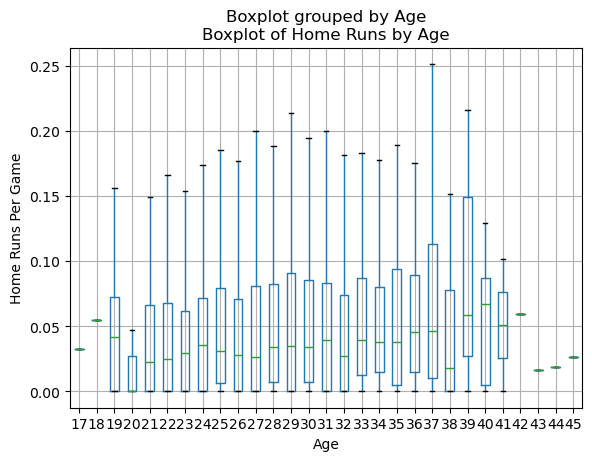

In [23]:
# Create a boxplot to see if there is a nonlinear relationship between age and home runs:
# "Age" and "homerun_per_game" columns are present in the DataFrame
# If not, replace them with the actual column names

filtered_players.boxplot(column='homerun_per_game', by='Age', showfliers=False)

# Set labels and title

plt.xlabel('Age')
plt.ylabel('Home Runs Per Game')
plt.title('Boxplot of Home Runs by Age')

# Show the plot

plt.show()

For the box plot, there is a no linear relationship. Age 31 will be used as a cut off number for running an independent t-test.

In [24]:
# Running a t-test on age (under versus over 31 years) and home runs to see if there is any statsitical significance:

filtered_age_1 = filtered_players[filtered_players['Age'] >= 31]["homerun_per_game"]
filtered_age_2 = filtered_players[filtered_players['Age'] < 31]["homerun_per_game"]

t_stat, p_value = st.ttest_ind(filtered_age_1, filtered_age_2)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Check for statistical significance

alpha = 0.05
if p_value < alpha:
    print('The difference is statistically significant.')
else:
    print('The difference is not statistically significant.')

#There is a slight statistical significance 

T-Statistic: 2.6006995422141905
P-Value: 0.009353528763191279
The difference is statistically significant.


For the independent t-test, which looks at two age groups (up to age 31, and then age 31 and over) within homeruns per game, there is a slight statistical signifance, which makes sense as the linear regression of age and homeruns per game showed a slight positive correlation.

When looking at home runs per game, as an impact indicator of performance based on age, we are able to reject the null hypothesis that age does not have an impact on player performance. 

# Research Question #2:

### What hitting statistics (on base percentage, batting average, and slugging average (if any) have a relationship with the number of runs a player scores?

Will compare these three independent variables against on single dependent variable (runs scored).

<function matplotlib.pyplot.show(close=None, block=None)>

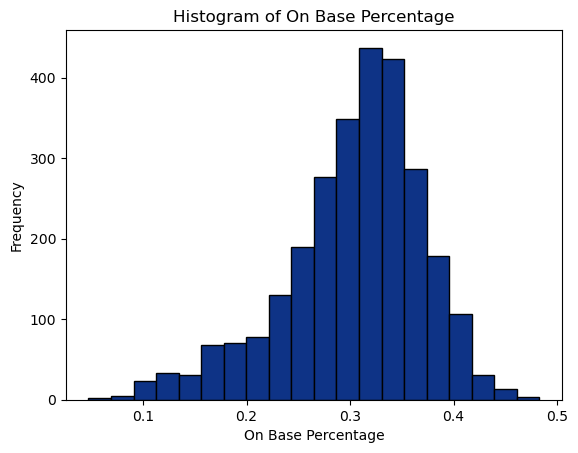

In [25]:
# Plot a histogram for each of the three independent variables. This helps to understand the distribution of each variable:
# Histogram for On_Base_Percentage or "OBP"

plt.hist(filtered_players['On_Base_Percentage'], bins =20, color= (14/255, 51/255, 134/255), edgecolor= 'black')
plt.xlabel ('On Base Percentage')
plt.ylabel ('Frequency')
plt.title('Histogram of On Base Percentage')
plt.show

# plt.savefig(r"C:\Users\emily\OneDrive\Desktop\Project_one\Project_01\Histogram_OBP")

<function matplotlib.pyplot.show(close=None, block=None)>

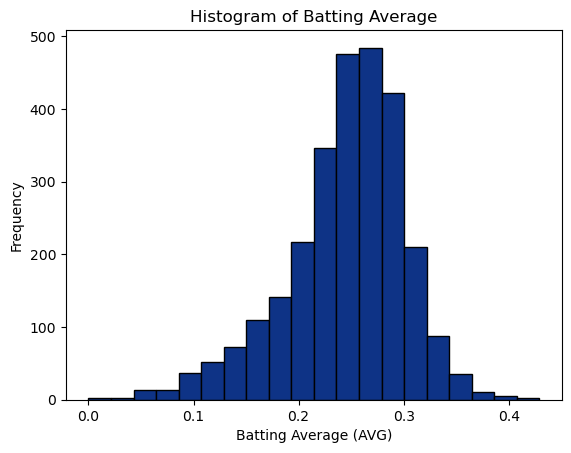

In [26]:
# Histogram for Batting Average or "AVG":

plt.hist(filtered_players['Batting_Average'], bins =20, color= (14/255, 51/255, 134/255), edgecolor= 'black')
plt.xlabel ('Batting Average (AVG)')
plt.ylabel ('Frequency')
plt.title('Histogram of Batting Average')
plt.show
# plt.savefig(r"C:\Users\emily\OneDrive\Desktop\Project_one\Project_01\Histogram_AVG")

<function matplotlib.pyplot.show(close=None, block=None)>

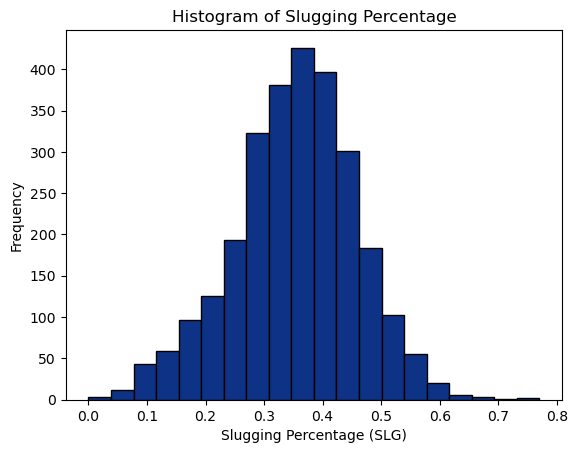

In [27]:
# Histogram for Slugging_Percentage or "SLG":

plt.hist(filtered_players['Slugging_Percentage'], bins =20, color= (14/255, 51/255, 134/255), edgecolor= 'black')
plt.xlabel ('Slugging Percentage (SLG)')
plt.ylabel ('Frequency')
plt.title('Histogram of Slugging Percentage')
plt.show
# plt.savefig(r"C:\Users\emily\OneDrive\Desktop\Project_one\Project_01\Histogram_SLG")

<function matplotlib.pyplot.show(close=None, block=None)>

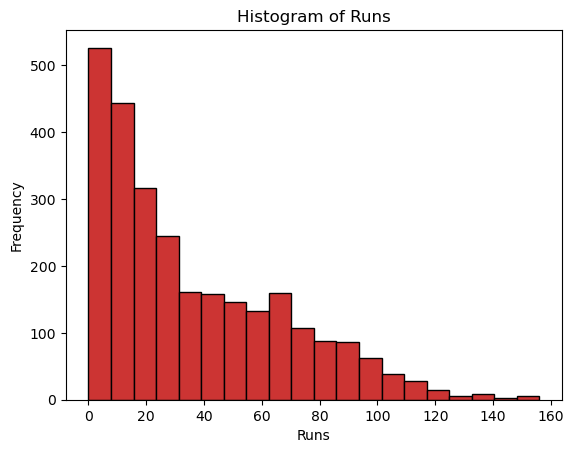

In [28]:
# Histogram for dependent variable 'runs':

plt.hist(filtered_players['Runs'], bins =20, color= (204/255, 52/255, 51/255), edgecolor= 'black')
plt.xlabel ('Runs')
plt.ylabel ('Frequency')
plt.title('Histogram of Runs')
plt.show
# plt.savefig(r"C:\Users\emily\OneDrive\Desktop\Project_one\Project_01\Histogram_at_bats_filtered")

Here we can see that the histogram for Runs skews left, indicating most players have a low number of runs scored.

The r-squared is: 0.3765008896970237


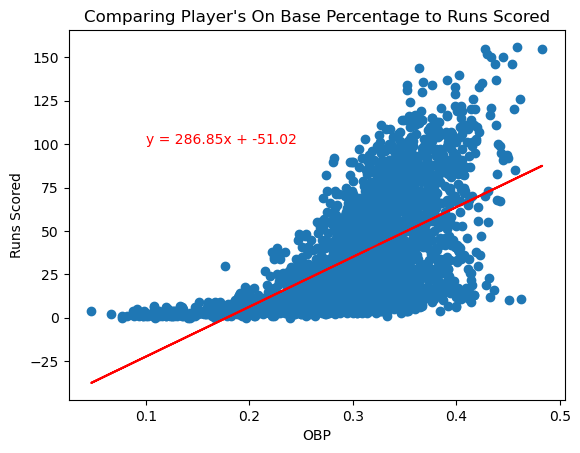

In [29]:
# Plot each of the independent variables against the dependent variable (runs) using a linear regression model.
# Plot "OBP" as a function of 'runs'.

x_values = filtered_players['On_Base_Percentage']
y_values = filtered_players['Runs']

#Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Adding labels, title and annotation
plt.annotate(line_eq,(0.1,100),fontsize=10,color="red")
plt.xlabel('OBP')
plt.ylabel('Runs Scored')
plt.title("Comparing Player's On Base Percentage to Runs Scored")
print(f"The r-squared is: {rvalue**2}")
# plt.savefig(r"C:\Users\emily\OneDrive\Desktop\Project_one\Project_01\Scatter_OBP")
plt.show()

There is a positive relationship (slope) between OBP and runs scored. As a player's on base percentage increases, so should the number of runs that the player scores. The more likely a player is to get on base, the more chances that a player will have an opportunity to score. We do see some outliers in this plot where we see a few players with high OBP and low runs scored. This may be due to some players that do not play in very many games and therefore will not have the same number of opportunities to score even though they have a higher OBP.

In [30]:
# Checking the data in Runs column for any negative values:

print("Minimum Runs:", filtered_players["Runs"].min())
print("Maximum Runs:", filtered_players["Runs"].max())

Minimum Runs: 0
Maximum Runs: 156


The r-squared is: 0.3652327981153649


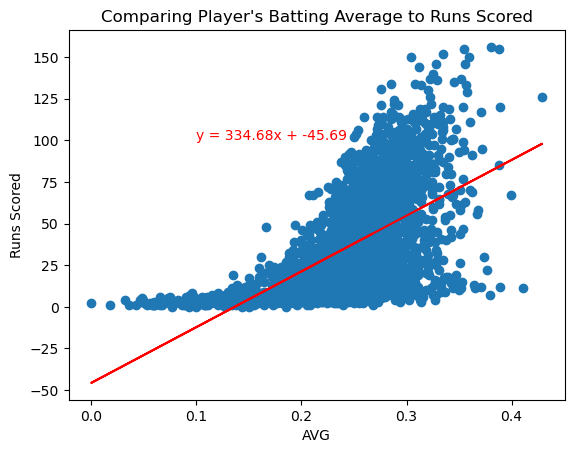

In [31]:
# Plot "AVG" as a function of 'runs':

x_values = filtered_players['Batting_Average']
y_values = filtered_players['Runs']

# Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Adding labels, title and annotation
plt.annotate(line_eq,(0.1,100),fontsize=10,color="red")
plt.xlabel('AVG')
plt.ylabel('Runs Scored')
plt.title("Comparing Player's Batting Average to Runs Scored")
print(f"The r-squared is: {rvalue**2}")
# plt.savefig(r"C:\Users\emily\OneDrive\Desktop\Project_one\Project_01\Scatter_AVG")
plt.show()

There is a positive relationship (slope) between AVG and runs scored. As a player's batting average increases, so should the number of runs that the player scores. As a player's batting average increases, the more likely they are to get a hit as a bat, and therefore be in a position to score.


The r-squared is: 0.3803310659858904


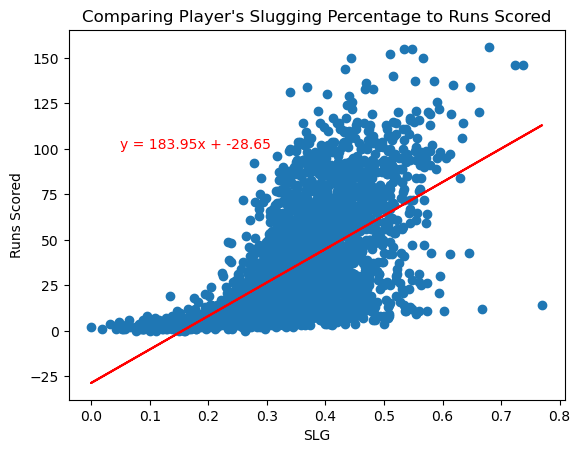

In [32]:
# Plot "SLG" as a function of 'runs':

x_values = filtered_players['Slugging_Percentage']
y_values = filtered_players['Runs']

# Performing Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the scatter plot and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Adding labels, title and annotation
plt.annotate(line_eq,(0.05,100),fontsize=10,color="red")
plt.xlabel('SLG')
plt.ylabel('Runs Scored')
plt.title("Comparing Player's Slugging Percentage to Runs Scored")
print(f"The r-squared is: {rvalue**2}")
# plt.savefig(r"C:\Users\emily\OneDrive\Desktop\Project_one\Project_01\Scatter_SLG")
plt.show()

There is a positive relationship (slope) between SLG and runs scored. As an individual player's SLG increases, generally so should the number of runs that the player scores.


## Research Question #3:
### Does player position have an impact on batter performance? 

We will compare the player’s position to their runs batted, bases stolen, and home runs.

Preliminary visualizations to assess player position and batter performance:

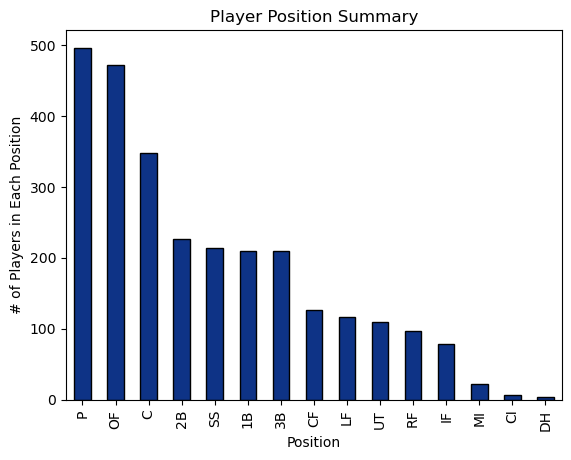

First, we observe that there are many more players in the Pitcher position than all other positions,
      so there is potential for this to skew the comparisons. 
      For example, because there are so many pitchers, 
      will we be able to glean accurate insight on how player position impacts the number of home runs, 
      if the pitcher position always has the most home runs simply due to the number of players?
      
      Next we look at three measures of performance for each position.


In [33]:
# Player Position Summary: The number of players in each position
position_total = filtered_players["Position"].value_counts()
position_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Players in Each Position',
                    title="Player Position Summary",
                    color='#0E3386',
                    edgecolor='black')
# plt.savefig("Figures/Player_Position_Summary.png")
plt.show()

print("""First, we observe that there are many more players in the Pitcher position than all other positions,
      so there is potential for this to skew the comparisons. 
      For example, because there are so many pitchers, 
      will we be able to glean accurate insight on how player position impacts the number of home runs, 
      if the pitcher position always has the most home runs simply due to the number of players?
      
      Next we look at three measures of performance for each position.""")

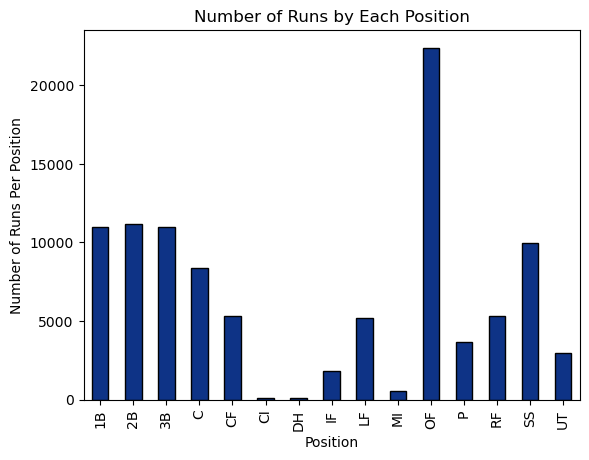

This eases our concern about the pitchers automatically having the 
      largest number of runs batted, but we observe that the next most common positions,
      outfielders, catchers, and first, second, and third basemen,
      also have the largest number of runs batted.
      
      
      
      


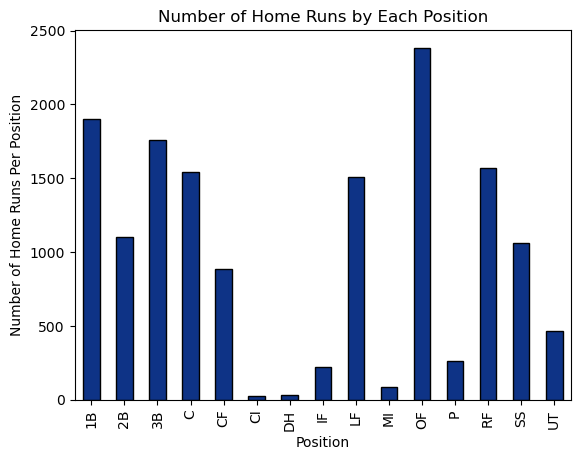

We notice a similar concern as the number of runs batted.  
      However, left- and right-fielders, positions that have a relatively
      small number of players,  score a competitive number of home runs.
      
      
      
      


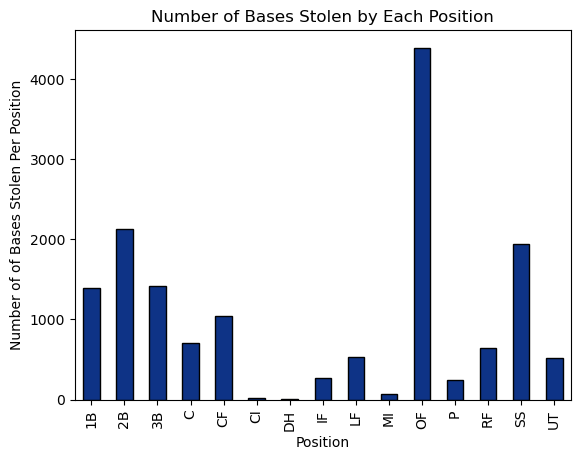

Outfielders, the second largest position category, perform well again. Shortstops
      perform comparatively well for the number of players.
      

      However, the positions that contain the fewest players
      (Corner Infield, Middle Infield, and Designated Hitter)
      consistenly have the lowest count for each measure of performance. 


      Further analysis is needed to determine a better measure of comparison.
      
      
      
      


In [34]:
# Number of Runs Batted by Each Position:

position_runs_total = filtered_players.groupby(["Position"])["Runs"].sum()
position_runs_total.head()
position_runs_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='Number of Runs Per Position',
                    title="Number of Runs by Each Position",
                    color='#0E3386',
                    edgecolor='black')
plt.show()
print("""This eases our concern about the pitchers automatically having the 
      largest number of runs batted, but we observe that the next most common positions,
      outfielders, catchers, and first, second, and third basemen,
      also have the largest number of runs batted.
      
      
      
      """)


# Number of Home Runs by Each Position
position_homeruns_total = filtered_players.groupby(["Position"])["Home_Runs"].sum()
position_homeruns_total.head()
position_homeruns_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='Number of Home Runs Per Position',
                    title="Number of Home Runs by Each Position",
                    color='#0E3386',
                    edgecolor='black')
# plt.savefig("Figures/Homeruns_Sum.png")
plt.show()
print("""We notice a similar concern as the number of runs batted.  
      However, left- and right-fielders, positions that have a relatively
      small number of players,  score a competitive number of home runs.
      
      
      
      """)


# Number of Bases Stolen by Each Position
position_basesstolen_total = filtered_players.groupby(["Position"])["Stolen_Bases"].sum()
position_basesstolen_total.head()
position_basesstolen_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='Number of of Bases Stolen Per Position',
                    title="Number of Bases Stolen by Each Position",
                    color='#0E3386',
                    edgecolor='black')
plt.show()
print("""Outfielders, the second largest position category, perform well again. Shortstops
      perform comparatively well for the number of players.
      

      However, the positions that contain the fewest players
      (Corner Infield, Middle Infield, and Designated Hitter)
      consistenly have the lowest count for each measure of performance. 


      Further analysis is needed to determine a better measure of comparison.
      
      
      
      """)

#### Further analysis to assess player position and batter performance:

To control for the number of players in each position, we will divide each performance measure by the number of players in each position.

In [35]:
# Set up for calculation:

# Confirm data structures
print(type(position_total))
print(type(position_runs_total))


# The position total index does not match the indices of the 
#   other Series in the comparison, so it will need to be changed.
print(position_total)
print(position_runs_total)


# For the series containing The number of players in each position,
#   sort the index so that it matches  (alphabetical)
position_count = position_total.sort_index()
position_count

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
Position
P     496
OF    472
C     348
2B    227
SS    213
1B    210
3B    209
CF    126
LF    117
UT    110
RF     97
IF     78
MI     22
CI      6
DH      4
Name: count, dtype: Int64
Position
1B    10956
2B    11190
3B    10992
C      8397
CF     5346
CI      121
DH       98
IF     1850
LF     5192
MI      565
OF    22397
P      3644
RF     5298
SS     9995
UT     2948
Name: Runs, dtype: int64


Position
1B    210
2B    227
3B    209
C     348
CF    126
CI      6
DH      4
IF     78
LF    117
MI     22
OF    472
P     496
RF     97
SS    213
UT    110
Name: count, dtype: Int64

In [36]:
# Perform calculations:

# The number of ________ for that position / the number of players in that position 
#       = the average number of ________ per player in that position


# Average number of runs by each position:
runs_batted_avg_byposition = position_runs_total / position_count
print("Avg Runs batted:")
print(runs_batted_avg_byposition)

# Average number of homeruns by each position:
homeruns_avg_by_position = position_homeruns_total / position_count
print("Avg Homeruns:")
print(homeruns_avg_by_position)


# Average number of bases stolen by each position:
bases_stolen_avg_by_position = position_basesstolen_total / position_count
print("Avg Bases stolen:")
print(bases_stolen_avg_by_position)


Avg Runs batted:
Position
1B    52.171429
2B    49.295154
3B    52.593301
C      24.12931
CF    42.428571
CI    20.166667
DH         24.5
IF    23.717949
LF    44.376068
MI    25.681818
OF    47.451271
P      7.346774
RF    54.618557
SS    46.924883
UT         26.8
dtype: Float64
Avg Homeruns:
Position
1B     9.057143
2B     4.845815
3B     8.425837
C      4.428161
CF     7.007937
CI          4.5
DH          8.5
IF     2.846154
LF    12.871795
MI     3.727273
OF     5.052966
P      0.524194
RF    16.195876
SS     4.985915
UT     4.209091
dtype: Float64
Avg Bases stolen:
Position
1B    6.628571
2B    9.361233
3B    6.803828
C     2.020115
CF    8.325397
CI    3.166667
DH         1.5
IF    3.384615
LF    4.538462
MI    3.363636
OF    9.309322
P     0.481855
RF    6.628866
SS    9.117371
UT    4.763636
dtype: Float64


In [37]:
# Convert the individual series into a single dataframe:

averages_data = pd.DataFrame({'Avg Runs':runs_batted_avg_byposition,
                                'Avg Homeruns':homeruns_avg_by_position,
                                'Avg Bases Stolen':bases_stolen_avg_by_position})
averages_data

,Avg Runs,Avg Homeruns,Avg Bases Stolen
Position,,,
1B,52.171429,9.057143,6.628571
2B,49.295154,4.845815,9.361233
3B,52.593301,8.425837,6.803828
C,24.12931,4.428161,2.020115
CF,42.428571,7.007937,8.325397
CI,20.166667,4.5,3.166667
DH,24.5,8.5,1.5
IF,23.717949,2.846154,3.384615
LF,44.376068,12.871795,4.538462


In [38]:
# We want a way to visualize how well a position performs compared to how common the position is:
# Designate the index of our Dataframe to be in descending order of position popularity

index_array = position_total.index
index_series = pd.Series(index_array, name='Position')
index_series

0      P
1     OF
2      C
3     2B
4     SS
5     1B
6     3B
7     CF
8     LF
9     UT
10    RF
11    IF
12    MI
13    CI
14    DH
Name: Position, dtype: string

In [39]:
# Display the dataframe to confirm:

averages_data_by_position_count = averages_data.reindex(index=index_series)
averages_data_by_position_count

,Avg Runs,Avg Homeruns,Avg Bases Stolen
Position,,,
P,7.346774,0.524194,0.481855
OF,47.451271,5.052966,9.309322
C,24.12931,4.428161,2.020115
2B,49.295154,4.845815,9.361233
SS,46.924883,4.985915,9.117371
1B,52.171429,9.057143,6.628571
3B,52.593301,8.425837,6.803828
CF,42.428571,7.007937,8.325397
LF,44.376068,12.871795,4.538462


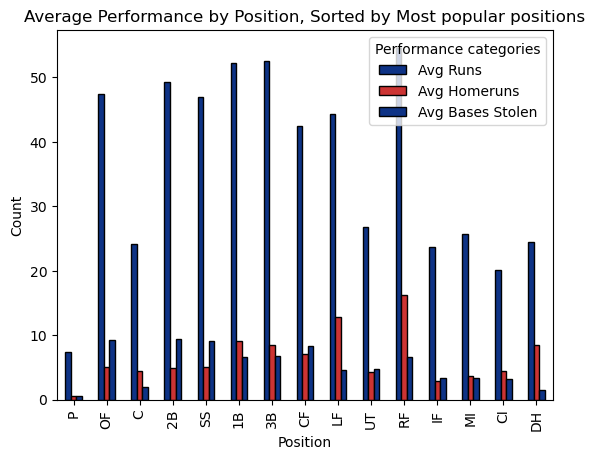

In [40]:
# Plot the averages data BUT with the player position count starting at left as in original figure:

averages_data_by_position_count_plot = averages_data_by_position_count.plot(kind='bar', stacked=False,
                                        color=['#0E3386','#CC3433'],
                                        edgecolor='black')          
averages_data_by_position_count_plot.legend(loc='center', bbox_to_anchor=(1.0, 0.5))
plt.title('Average Performance by Position, Sorted by Most popular positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.legend(title='Performance categories')
# plt.savefig("Figures/Avg_Performance_Sorted.png")
plt.show()

#Use individual graphs for each performance measure (3) for presentation

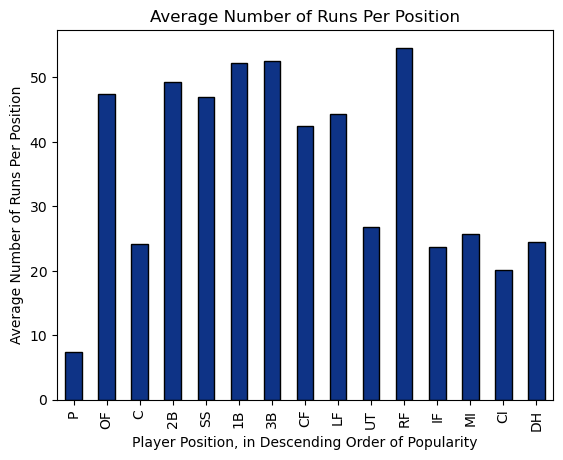

In [41]:
# Plot the averages data BUT with the player position count starting at left as in original figure:
# Runs

averages_data_by_position_count["Avg Runs"].plot(kind='bar',
                                        stacked=False,
                                        color='#0E3386',
                                        edgecolor='black',
                                        legend=None
                                        )          
plt.title('Average Number of Runs Per Position')
plt.xlabel('Player Position, in Descending Order of Popularity')
plt.ylabel('Average Number of Runs Per Position')
# plt.savefig("Figures/Avg_Performance_Runs.png")
plt.show()

Right-fielders are most likely to perform the best in runs.

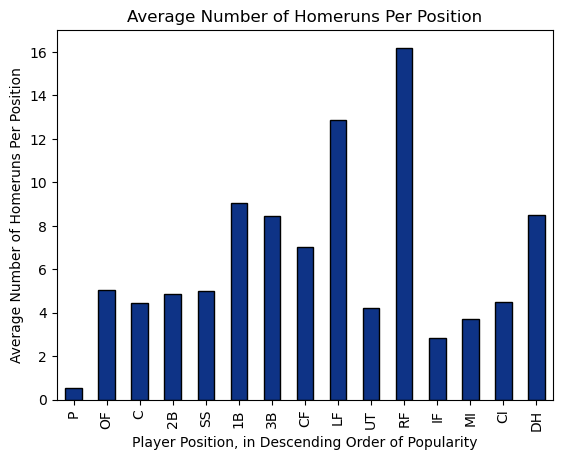

In [42]:
# Plot the averages data BUT with the player position count starting at left as in original figure:
# Home runs

averages_data_by_position_count["Avg Homeruns"].plot(kind='bar',
                                        stacked=False,
                                        color='#0E3386',
                                        edgecolor='black',
                                        legend=None
                                        )          
plt.title('Average Number of Homeruns Per Position')
plt.xlabel('Player Position, in Descending Order of Popularity')
plt.ylabel('Average Number of Homeruns Per Position')
# plt.savefig("Figures/Avg_Performance_HomeRuns.png")
plt.show()

Right-fielders are most likely to perform the best in getting homeruns.

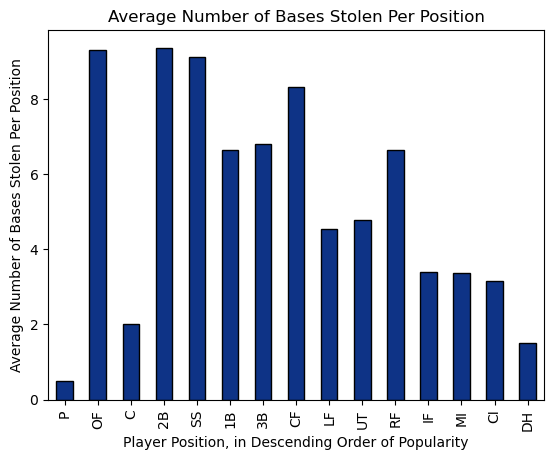

In [43]:
# Plot the averages data BUT with the player position count starting at left as in original figure:
# Bases Stolen

averages_data_by_position_count["Avg Bases Stolen"].plot(kind='bar',
                                        stacked=False,
                                        color='#0E3386',
                                        edgecolor='black',
                                        legend=None
                                        )          
plt.title('Average Number of Bases Stolen Per Position')
plt.xlabel('Player Position, in Descending Order of Popularity')
plt.ylabel('Average Number of Bases Stolen Per Position')
# plt.savefig("Figures/Avg_Performance_BasesStolen.png")
plt.show()

Second-basemen are most likely to perform the best in stealing bases.

## Research Question #4:
### Does a pitcher’s overall performance impact game losses and wins? 

We will compare game losses and wins with pitcher variables such as hits per inning, runs allowed, and walks allowed.

#### Add constraints to restrict data to only pitchers who threw 100 innings in a season

In [44]:
# Filtering to Include Only >= 100 Innings:

filtered_pitchers=pitching_data[pitching_data['Innings_Pitched']>= 100]
filtered_pitchers.to_csv('filtered_pitchers.csv')
filtered_pitchers

,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
1,2,2023,SP,Jameson Taillon,31,8,10,0.444,4.84,30,...,93,4.61,1.276,9.1,1.6,2.4,8.2,3.41,Right,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
3,4,2023,SP,Kyle Hendricks,33,6,8,0.429,3.74,24,...,120,3.81,1.204,9.1,0.9,1.8,6.1,3.44,Right,No
4,5,2023,SP,Marcus Stroman,32,10,9,0.526,3.95,27,...,113,3.58,1.259,7.9,0.6,3.4,7.8,2.29,Right,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,1,1879,SP,Terry Larkin,23,31,23,0.574,2.44,58,...,107,2.49,1.060,9.0,0.1,0.5,2.5,4.73,Right,No
2284,2,1879,SP,Frank Hankinson,23,15,10,0.600,2.50,26,...,104,2.49,1.192,9.7,0.0,1.1,2.7,2.56,Right,No
2285,1,1878,SP,Terry Larkin,22,29,26,0.527,2.24,56,...,109,2.18,1.071,9.1,0.1,0.6,2.9,5.26,Right,No
2288,1,1877,SP,George Bradley,24,19,23,0.452,3.31,50,...,90,2.97,1.246,10.3,0.1,0.9,1.3,1.51,Right,No


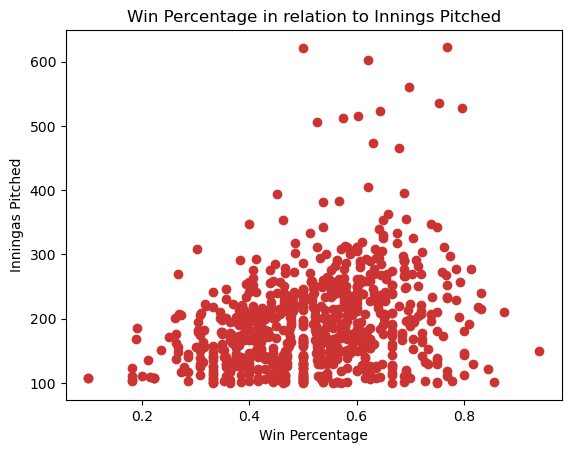

In [45]:
# Does a pitcher's overall performance impact game losses and wins?:

# Compare Innings Pitched to win percentage
plt.scatter(filtered_pitchers["Winning_Percentage"], filtered_pitchers["Innings_Pitched"], color="#CC3433")
plt.title("Win Percentage in relation to Innings Pitched")
plt.xlabel("Win Percentage")
plt.ylabel ("Inningas Pitched")
plt.show()

Shows the innnings pitched in relation to win percentage

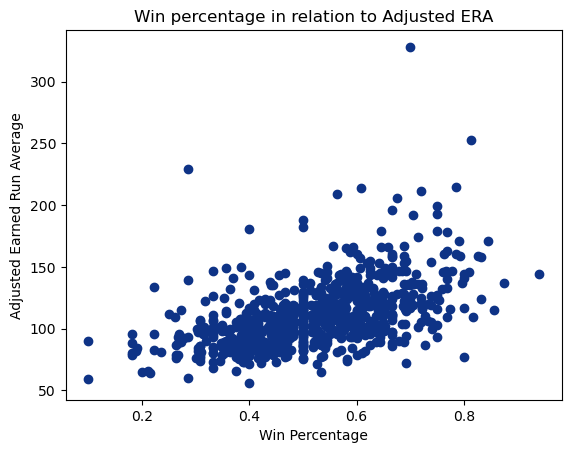

In [46]:
# Compare Adjusted ERA to win percentage:

plt.scatter(filtered_pitchers["Winning_Percentage"], filtered_pitchers["Adjusted_Earned_Run_Average"], color = "#0E3386")
plt.title("Win percentage in relation to Adjusted ERA")
plt.xlabel("Win Percentage")
plt.ylabel("Adjusted Earned Run Average")
plt.show()

Adjusted ERA (ERA+) is ERA in relation to the entire league, as well as accounting for external factors like ballparks and opponents.
The higher the ERA+ better and the difference from the league average (100) the percent better or worse a particular pitcher is.
Graph shows adjusted ERA in relation to win percentage in which there is a rather consistent upward trend.

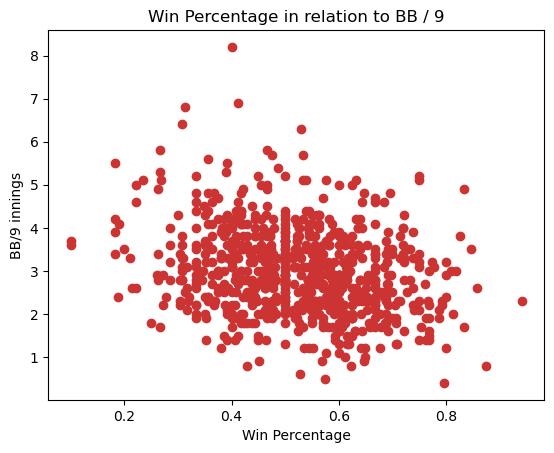

In [47]:
# Compare Walks per 9 innings to win percentage:

plt.scatter(filtered_pitchers["Winning_Percentage"], filtered_pitchers["Walks_Per_Nine_Innings"], color="#CC3433")
plt.title("Win Percentage in relation to BB / 9")
plt.xlabel("Win Percentage")
plt.ylabel ("BB/9 innings")
plt.show()

There is a slight negative corelation in win percentage when compared to walks per nine innings.

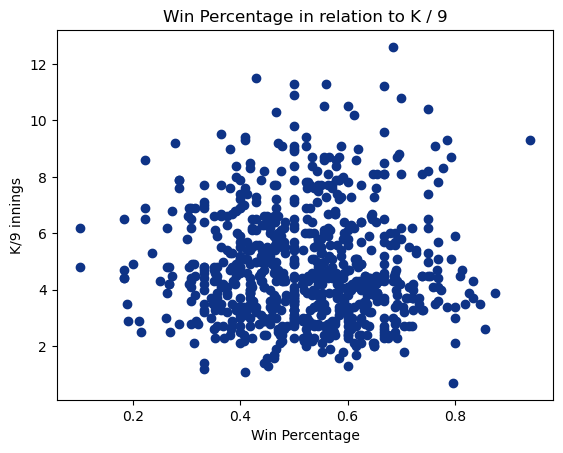

In [48]:
# Compare Strikeoutes per 9 innings to win percentage:

plt.scatter(filtered_pitchers["Winning_Percentage"], filtered_pitchers["Strikeouts_Per_Nine_Innings"], color = "#0E3386")
plt.title("Win Percentage in relation to K / 9")
plt.xlabel("Win Percentage")
plt.ylabel ("K/9 innings")
plt.show()

There seems to be little relation in win percentage to strikeouts per nine innings.

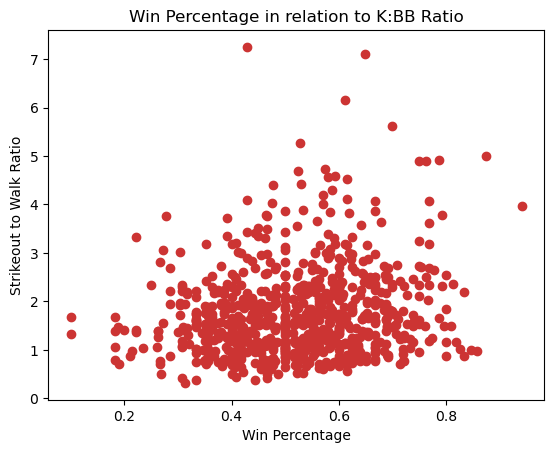

In [49]:
# Compare  Strikeout to Walk ration to win percentage:

plt.scatter(filtered_pitchers["Winning_Percentage"], filtered_pitchers["Strikeout_Walk_Ratio"], color="#CC3433")
plt.title("Win Percentage in relation to K:BB Ratio")
plt.xlabel("Win Percentage")
plt.ylabel ("Strikeout to Walk Ratio")
plt.show()

In Strikeout to Walk ratio the higher the number the better so there is a slight upward trend but not well defined.
Overall the statistic we can use to best project win percentage is the Adjusted ERA.
Question #5: Does a player’s dominant hand (i.e. left or right) have an impact on the player’s performance?

## Research Question #5:
### Does a player’s dominant hand (i.e. left or right) for the Pitchers have an impact on the player’s performance? 

We will compare the player’s quantity of Right and Left Handed Pitchers to determine their performance.

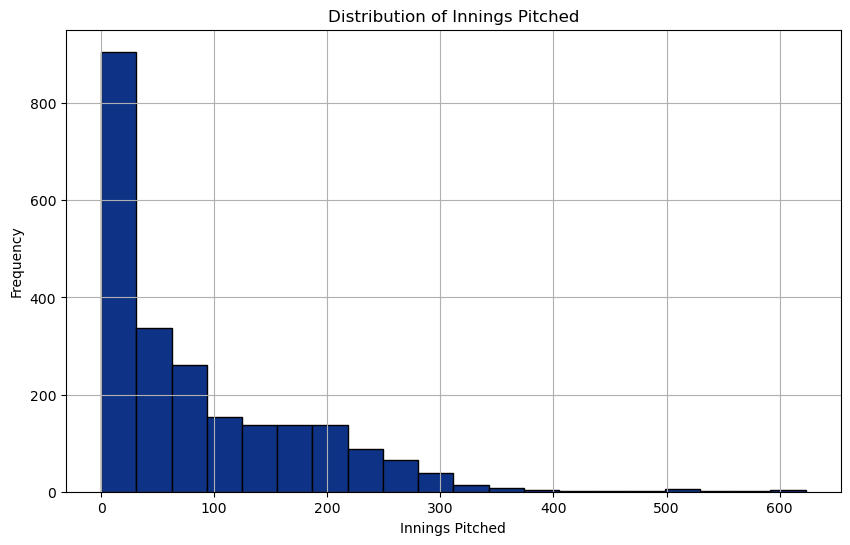

In [50]:
# All DataFrame 'pitching_data_df' frequency of 'Innings_Pitched':
pitching_data_df = pd.DataFrame(pitching_data)

selected_pitching_data_df = pitching_data_df[['Year', 'Age', 'Wins', 'Winning_Percentage', 'Innings_Pitched', 
    'Strikeouts','Strikeouts_Per_Nine_Innings', 'Dominant_Hand']]
selected_pitching_data_df = selected_pitching_data_df[
    (selected_pitching_data_df['Innings_Pitched'] >= 100) & 
    (selected_pitching_data_df['Age'] >= 18)]

selected_pitching_data_df

plt.figure(figsize=(10, 6))

# Plotting the histogram
plt.hist(pitching_data_df['Innings_Pitched'], bins=20, color='#0E3386', edgecolor='black')

# Adding labels and title
plt.xlabel('Innings Pitched')
plt.ylabel('Frequency')
plt.title('Distribution of Innings Pitched')

# Display the plot
plt.grid(True)
plt.show()

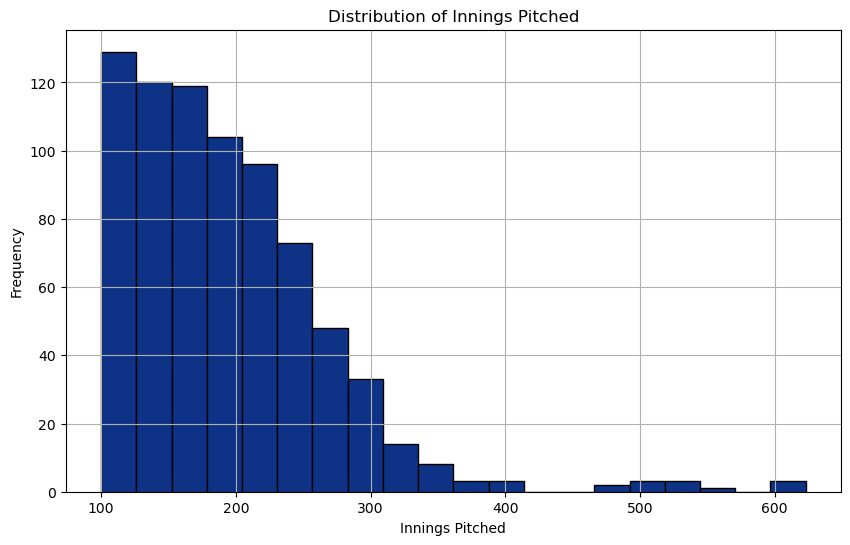

In [51]:
# Selected Pitchers DataFrame 'selected_pitching_data_df' frequency of 'Innings_Pitched':'
plt.figure(figsize=(10, 6))

# Plotting the histogram
plt.hist(selected_pitching_data_df['Innings_Pitched'], bins=20, color='#0E3386', edgecolor='black')

# Adding labels and title
plt.xlabel('Innings Pitched')
plt.ylabel('Frequency')
plt.title('Distribution of Innings Pitched')

# Display the plot
plt.grid(True)
plt.show()

In [52]:
# Defining DataFrame for L/R Pitching Data, filtering for pitchers that have >= innings played:

pitching_data_df = pd.DataFrame(pitching_data)

selected_pitching_data_df = pitching_data_df[['Year', 'Age', 'Wins', 'Winning_Percentage', 'Innings_Pitched', 
    'Strikeouts','Strikeouts_Per_Nine_Innings', 'Dominant_Hand']]
selected_pitching_data_df = selected_pitching_data_df[
    (selected_pitching_data_df['Innings_Pitched'] >= 100) & 
    (selected_pitching_data_df['Age'] >= 18)]
selected_pitching_data_df

,Year,Age,Wins,Winning_Percentage,Innings_Pitched,Strikeouts,Strikeouts_Per_Nine_Innings,Dominant_Hand
0,2023,27,16,0.762,173.1,176,9.1,Left
1,2023,31,8,0.444,154.1,140,8.2,Right
2,2023,34,11,0.500,142.1,141,8.9,Left
3,2023,33,6,0.429,137.0,93,6.1,Right
4,2023,32,10,0.526,136.2,119,7.8,Right
...,...,...,...,...,...,...,...,...
2283,1879,23,31,0.574,513.1,142,2.5,Right
2284,1879,23,15,0.600,230.2,69,2.7,Right
2285,1878,22,29,0.527,506.0,163,2.9,Right
2288,1877,24,19,0.452,394.0,59,1.3,Right


In [53]:
selected_columns = ['Innings_Pitched', 'Wins', 'Winning_Percentage', 'Strikeouts_Per_Nine_Innings']
description = selected_pitching_data_df[selected_columns].describe()

description

,Innings_Pitched,Wins,Winning_Percentage,Strikeouts_Per_Nine_Innings
count,762.000000,762.000000,762.000000,762.000000
mean,193.900919,11.772966,0.520516,4.807743
std,75.281078,6.459184,0.134974,1.990643
min,100.000000,1.000000,0.100000,0.700000
25%,139.000000,7.000000,0.421000,3.325000
50%,181.600000,11.000000,0.524000,4.400000
75%,232.775000,15.000000,0.611000,6.000000
max,623.000000,53.000000,0.941000,12.600000


<Axes: ylabel='Dominant Hand'>

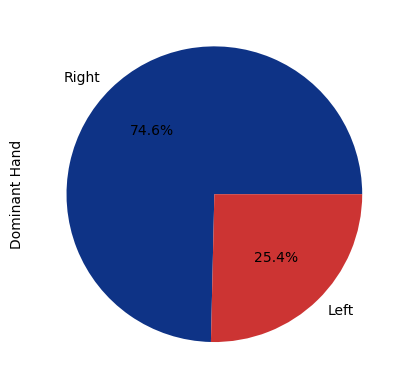

In [54]:
# Colors for Left & Right:
colors = ['#0E3386', '#CC3433']  

# Pie chart of right vs left-handed
dominant_hand_comparison = pitching_data["Dominant_Hand"].value_counts()
dominant_hand_comparison.plot(
    kind='pie',
    ylabel='Dominant Hand',
    autopct="%1.1f%%",
    colors=colors)

The dataframe shows that the Dominant Hand Pitchers for the Cubs is broken into 74.6% Right Handed vs. 25.4% Left Handed

               Strikeouts_Per_Nine_Innings
Dominant_Hand                             
Left                              4.925974
Right                             4.777796


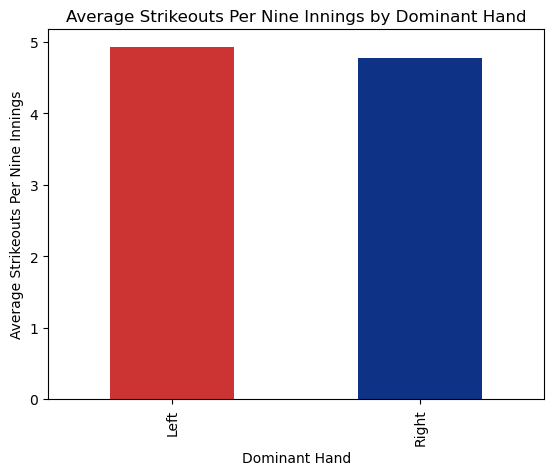

In [55]:
# Strikeouts Per 9 Innings:

performance_df9 = selected_pitching_data_df.groupby('Dominant_Hand').agg({
    'Strikeouts_Per_Nine_Innings': 'mean'})

# Results
print(performance_df9)

# Bar plot
performance_df9['Strikeouts_Per_Nine_Innings'].plot(kind='bar', color=['#CC3433', '#0E3386', 'red'])
plt.xlabel('Dominant Hand')
plt.ylabel('Average Strikeouts Per Nine Innings')
plt.title('Average Strikeouts Per Nine Innings by Dominant Hand')
plt.show()

To answer this question, we used the K/9 rate (Strike Outs per Nine Innings) that measures how many strikeouts a pitcher averages for every nine innings pitched, determined by dividing the pitcher strikeout total by his innings pitched total and multiplying the result by nine.

This shows that the Left Handed pitchers are slightly better performing compared to the Right Handed Pitchers, Left Handed having 4.92 K/9 vs Right Handed having a 4.77 K/9.

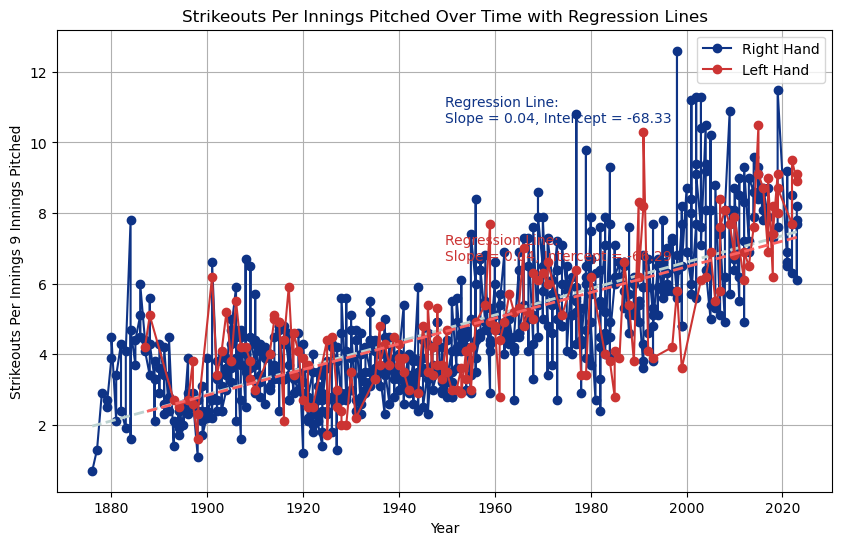

In [56]:
# Creating a Line Plot of Right vs Left comparison next to each other and showing a Linear Regression:

plt.figure(figsize=(10, 6))

# Data for 'Right' dominant hand
right_hand_data = selected_pitching_data_df[selected_pitching_data_df['Dominant_Hand'] == 'Right']
plt.plot(right_hand_data['Year'], right_hand_data['Strikeouts_Per_Nine_Innings'], label='Right Hand', marker='o', color='#0E3386')

# Linear regression line Right Hand
right_x = right_hand_data['Year'].values.reshape(-1, 1)
right_y = right_hand_data['Strikeouts_Per_Nine_Innings'].values.reshape(-1, 1)
right_model = LinearRegression().fit(right_x, right_y)
right_trend = right_model.predict(right_x)
plt.plot(right_hand_data['Year'], right_trend, color='#bcd2d0', linestyle='dashed', linewidth=2)

# Text description for 'Right Hand' regression line
right_description = f'Regression Line:\nSlope = {right_model.coef_[0][0]:.2f}, Intercept = {right_model.intercept_[0]:.2f}'
plt.text(0.5, 0.8, right_description, transform=plt.gca().transAxes, color='#0E3386')

# Data for 'Left' dominant hand
left_hand_data = selected_pitching_data_df[selected_pitching_data_df['Dominant_Hand'] == 'Left']
plt.plot(left_hand_data['Year'], left_hand_data['Strikeouts_Per_Nine_Innings'], label='Left Hand', marker='o', color='#CC3433')

# Linear regression line Left Hand
left_x = left_hand_data['Year'].values.reshape(-1, 1)
left_y = left_hand_data['Strikeouts_Per_Nine_Innings'].values.reshape(-1, 1)
left_model = LinearRegression().fit(left_x, left_y)
left_trend = left_model.predict(left_x)
plt.plot(left_hand_data['Year'], left_trend, color='#f96161', linestyle='dashed', linewidth=2)

# Text description for the 'Left Hand' regression line
left_description = f'Regression Line:\nSlope = {left_model.coef_[0][0]:.2f}, Intercept = {left_model.intercept_[0]:.2f}'
plt.text(0.5, 0.5, left_description, transform=plt.gca().transAxes, color='#CC3433')

#---------------------------------------

# Plot
plt.xlabel('Year')
plt.ylabel('Strikeouts Per Innings 9 Innings Pitched')
plt.title('Strikeouts Per Innings Pitched Over Time with Regression Lines')
plt.legend()
plt.grid(True)
plt.show()

Through history both left and right pitchers performance has been fairly similar; a better performance in the early years for left handed pitchers, about the same performance starting in the 1920’s to early 2000’s. In recent years the game has been more competitive and the data shows that in the last decade there has been improvements on the left hand pitchers, resulting in a better performance in the "strikeout per nine innings" (K/9) metric.